# **基于pandas matplotlib seaborn的数据可视化**

*2018年7月*

---

## 目录
- 一、简述
- 二、matplotlib基础
  1. 函数基本形式
  2. figure和axes的关系
  3. 子图的绘制
  4. 导出矢量图
- 三、Seaborn基础
- 四、绘图实例
  1. 散点图
  2. 条形图
  3. 直方图
  4. 核密度图
  5. 箱线图
  6. 小提琴图
  7. 双变量关系图jointplot
  8. 回归图
  9. pairplot 图 
  10. heatmap 图

# 一、简述

本文介绍基于pandas、matplotlib、seaborn库的Python数据可视化。pandas库是数据分析库，实现了一些基本的绘图方法。matplotlib和seaborn是Python中最常用的可视化工具，Python数据可视化一般是通过较底层的 Matplotlib 库和较高层的 Seaborn 库实现的。

Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。应该把Seaborn视为matplotlib的补充，而不是替代物。

那么Pandas与Seaborn之间有什么区别呢？其实两者都是使用了matplotlib来作图，但是有非常不同的设计差异。

在只需要简单地作图时直接用Pandas，但要想做出更加吸引人，更丰富的图就可以使用Seaborn；
Pandas的作图函数并没有太多的参数来调整图形，所以你必须要深入了解matplotlib；
Seaborn的作图函数中提供了大量的参数来调整图形，所以并不需要太深入了解matplotlib。

**建议用以下几个步骤学习如何使用matplotlib：**
1. 学习基本的matplotlib术语，尤其是什么是图和坐标轴
2. 始终使用面向对象的接口，从一开始就养成使用它的习惯
3. 用基础的pandas绘图开始你的可视化学习
4. 用seaborn进行更复杂的统计可视化
5. 用matplotlib来定制pandas或者seaborn可视化

**matplotlib作图的基本组成如下图：**

![what the anatomy of a matplotlib plot looks like](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Matplotlib+Tutorial/content_content_unknown.png)

**导入数据可视化需要的包**

In [1]:
# 导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 为了在jupyter notebook内嵌网页中显示图形，可打开以下开关
# 如果没有打开开关，每次图形显示时要使用函数：plt.show()
%matplotlib inline

In [4]:
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 二、Matplotlib基础

## 1. 函数基本形式

Matplotlib画图函数一般为如下形式：  
**plt.图名(x, y, '颜色 marker 线型')**  

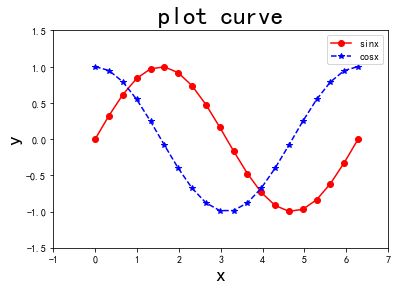

In [5]:
x = np.linspace(0, 2 * np.pi, 20)
plt.figure(figsize=(6, 4))# 新建一个图像，设置图像大小
plt.plot(x, np.sin(x), 'ro-', label='sinx')# 设置颜色、标记符号、线型、图例标签
plt.plot(x, np.cos(x), 'b*--', label='cosx')
plt.title('plot curve', fontsize=25)# 标题
plt.xlim(-1, 7)# x轴范围
plt.ylim(-1.5, 1.5)# y轴范围
plt.xlabel('x', fontsize=20)# x轴标签
plt.ylabel('y', fontsize=20)# y轴标签
plt.legend(loc='best')# 图例
plt.show()

## 2. figure和axes的关系

在matplotlib中，整个图像为一个Figure对象。在Figure对象中可以包含一个，或者多个Axes对象。每个Axes对象都是一个拥有自己坐标系统的绘图区域。每个Axes对象都是一个拥有自己坐标系统的绘图区域。

相应的，matplotlib有两种画图方式，pyplot方法和axes方法。pyplot代码简洁，适合在不涉及子图绘制的情况下使用；axes适合在绘制子图的情况下使用。

注：axes作图通过ax.set_{something}()设置图形参数

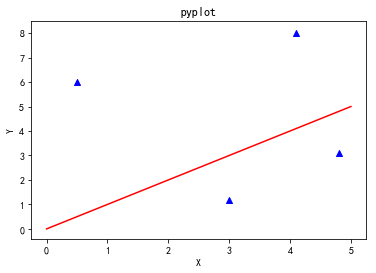

In [6]:
# pyplot作图
plt.figure()
plt.plot(np.arange(6), np.arange(6), color='r')
plt.scatter([0.5, 4.1, 4.8, 3], [6, 8, 3.1, 1.2], color='b', marker='^')
plt.title('pyplot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# axes作图一
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(6), np.arange(6), color='r')
ax.scatter([0.5, 4.1, 4.8, 3], [6, 8, 3.1, 1.2], color='b', marker='^')
ax.set_title('axes1')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

# axes作图二
fig, ax = plt.subplots()
ax.plot(np.arange(6), np.arange(6), color='r')
ax.scatter([0.5, 4.1, 4.8, 3], [6, 8, 3.1, 1.2], color='b', marker='^')
ax.set_title('axes2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

## 3. 子图的绘制
子图的绘制有两种方式，pyplot方式和axes面向对象的方式。

pyplot方式：subplot函数  
subplot(nrows, ncols, index, **kwargs)

axes方式一：add_subplot函数  
add_subplot(nrows, ncols, index, **kwargs)

axes方式二：subplots函数  
fig, ax = plt.subplots(ncols=列数, nrows=行数[, figsize=图片大小, ...])

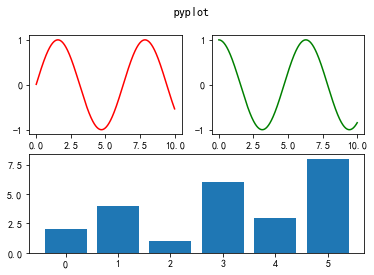

In [7]:
# pyplot方式
plt.figure()
X = np.arange(0.01, 10, 0.01)
# 分成2*2，占用第1个子图
plt.subplot(221)
plt.plot(X, np.sin(X), 'r-')

# 分成2*2，占用第2个子图
plt.subplot(222)
plt.plot(X, np.cos(X), 'g-')

# 分成2*1，占用第2个子图(即占用2*2第3、4子图)
plt.subplot(212)
plt.bar(np.arange(6), np.array([2, 4, 1, 6, 3, 8]))

plt.suptitle('pyplot')
plt.show()

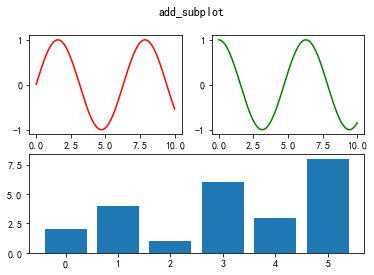

In [8]:
# axes方式一：add_subplot
# 参数同plt.subplot一致
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(X, np.sin(X), 'r-')

ax2 = fig.add_subplot(222)
ax2.plot(X, np.cos(X), 'g-')

ax3 = fig.add_subplot(212)
ax3.bar(np.arange(6), np.array([2, 4, 1, 6, 3, 8]))

fig.suptitle('add_subplot')
plt.show()

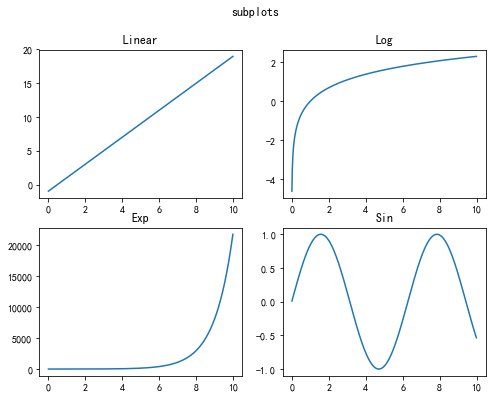

In [9]:
# axes方式二：subplots
# 相比add_subplot，函数调用比较简洁，但是不能自定义子图布局
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(8, 6))
X = np.arange(0.01, 10, 0.01)
ax[0, 0].plot(X, 2 * X - 1)
ax[0, 0].set_title("Linear")

ax[0, 1].plot(X, np.log(X))
ax[0, 1].set_title("Log")

ax[1, 0].plot(X, np.exp(X))
ax[1, 0].set_title("Exp")

ax[1, 1].plot(X, np.sin(X))
ax[1, 1].set_title("Sin")

fig.suptitle('subplots')
plt.show()

## 4. 导出矢量图

In [ ]:
plt.figure()
plt.plot(np.arange(6))
# pdf 格式
plt.savefig('./filename.pdf',format='pdf')
# svg 格式
plt.savefig('./filename.svg',format='svg')

# 三、Seaborn基础

Seaborn 要求原始数据的输入类型为 pandas 的 DataFrame 或 Numpy 数组，画图函数一般为如下形式  

sns.图名(x='X轴 列名', y='Y轴 列名', data=原始数据df对象)   
sns.图名(x='X轴 列名', y='Y轴 列名', hue='分组绘图参数', data=原始数据df对象)   
sns.图名(x=np.array, y=np.array[, ...])   

Seaborn有五个预设好的主题(style)：darkgrid, whitegrid, dark, white,和ticks(四周加边框和刻度)。它们各自适用于不同的应用和个人喜好。缺省的主题是darkgrid。

有4种预设好的上下文(context),按相对大小排序分别是:paper, notebook, talk,和poster.缺省的规模是notebook 

颜色（palette）有：muted（常用），RdBu，Blues_d，Set1等

通过sns.set()设置主题、上下文、调色板等，例：  
sns.set(style='white', context='talk', palette="muted", color_codes=True)

# 四、绘图实例

In [10]:
# 加载数据
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. 散点图

### pandas作图

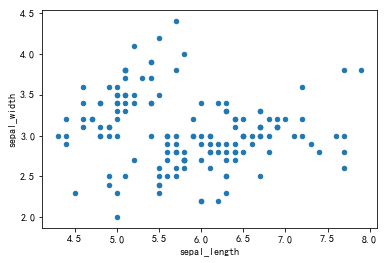

In [14]:
iris.plot(x='sepal_length', y='sepal_width', kind='scatter')

### matplotlib作图
使用plt.scatter()方法来做散点图，第一个参数作为x轴，第二参数作为y轴，注意两个参数都只能是列表数据或者Series

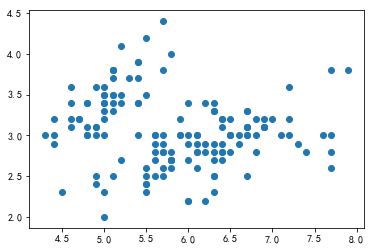

In [15]:
plt.scatter(iris['sepal_length'], iris['sepal_width'])

### seaborn作图
seaborn中有两个散点图，一个是普通的散点图，另一个是可以看出分布密度的散点图

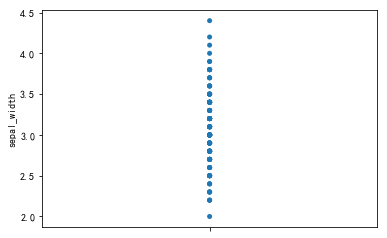

In [16]:
# 普通的散点图
sns.stripplot(y="sepal_width", data=iris)

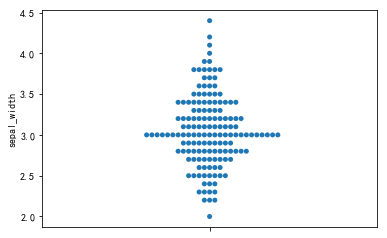

In [17]:
# 带分布密度的散点图
sns.swarmplot(y="sepal_width", data=iris)

## 2. 条形图

### pandas作图

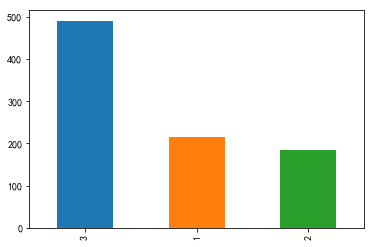

In [18]:
titanic.pclass.value_counts().plot(kind='bar')# kand='barh'水平条形图

### matplotlib作图

<BarContainer object of 8 artists>

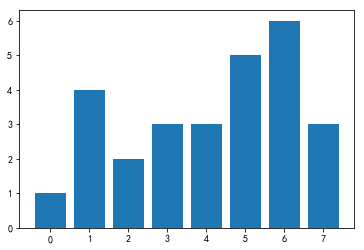

In [19]:
plt.bar(np.arange(8), np.array([1, 4, 2, 3, 3, 5, 6, 3]))

### seaborn作图

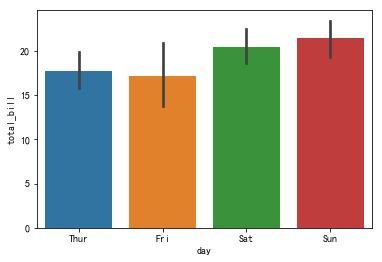

In [20]:
# barplot的统计函数，默认是变量的均值 estimator=np.mean
sns.barplot(x='day', y='total_bill', data=tips)

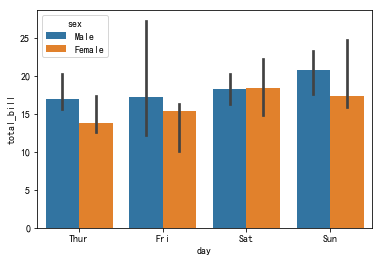

In [21]:
# 绘制变量中位数的条形图，estimator指定统计函数
sns.barplot(x='day', y='total_bill', hue='sex', data=tips, estimator=np.median)

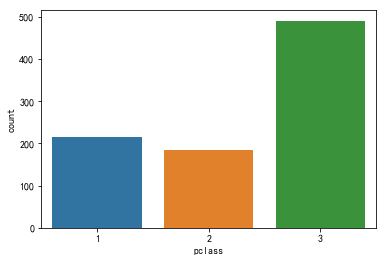

In [22]:
# 统计图countplot,对因子变量计数，然后绘制条形图
sns.countplot(x='pclass', data=titanic)

## 3. 直方图
要制作直方图，首先把X轴的值的范围等分成多个间隔，然后数出每个间隔中包含的值的数量，然后把该数量作为Y轴的值。

### pandas作图

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027EC2B00358>,
      dtype=object)

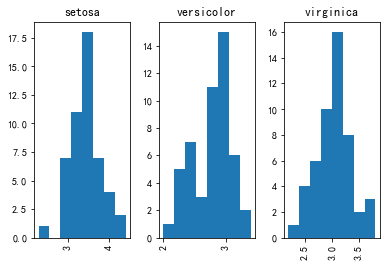

In [23]:
iris.hist('sepal_width', by='species',layout=(1,3), bins=8)

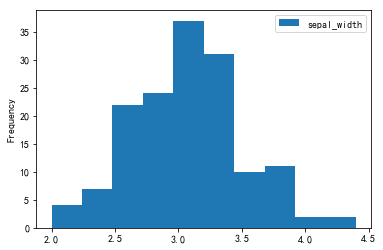

In [24]:
iris.plot(y='sepal_width', kind='hist')

### matplotlib作图

(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

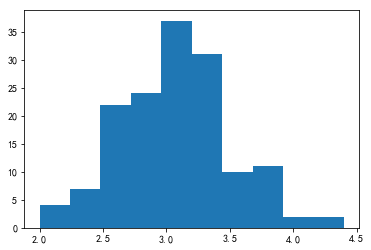

In [25]:
plt.hist(iris['sepal_width'])# 若设置参数density=True，则计算概率密度值

### seaborn作图

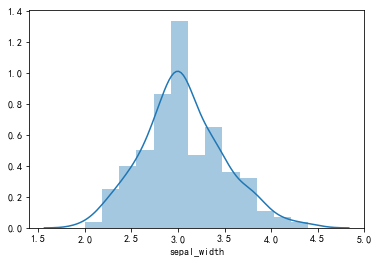

In [26]:
# 默认既绘制核密度曲线，也绘制直方图
# 直方图hist=True，核密度曲线kde=True
sns.distplot(iris['sepal_width'])

## 4. 核密度图

### pandas作图

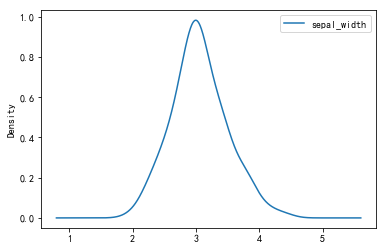

In [27]:
iris.plot(y='sepal_width', kind='kde')

### seaborn作图

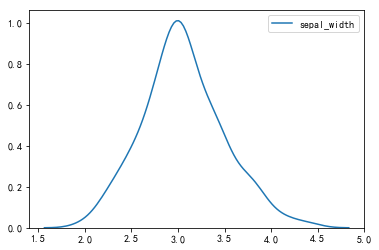

In [28]:
# 单变量
sns.kdeplot(iris['sepal_width'])

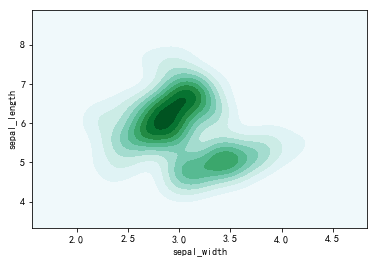

In [29]:
# 双变量密度图，相当于等高线图了
# shade 参数改用颜色深浅表示密度的大小
sns.kdeplot(iris['sepal_width'], iris['sepal_length'], shade=True)

## 5. 箱线图
箱型图是一种用作显示一组数据分散情况资料的统计图，基于五数概括法（最小值，第一个四分位数，第二个四分位数（中位数），第三个四分位数，最大值）的数据的一个图形汇总，还需要用到四分位数间距IQR = 第三个四分位数 - 第一个四分位数。

### pandas作图

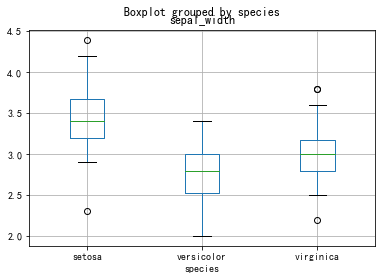

In [30]:
iris.boxplot(column='sepal_width', by='species')

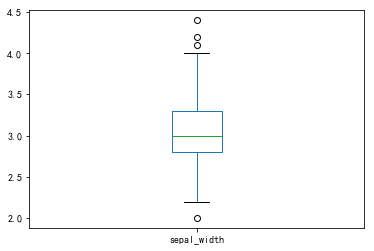

In [31]:
iris.plot(y='sepal_width', kind='box')

### matplotlib作图

{'whiskers': [<matplotlib.lines.Line2D at 0x27ec34c73c8>,
 'caps': [<matplotlib.lines.Line2D at 0x27ec34c7c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ec34c7278>],
 'medians': [<matplotlib.lines.Line2D at 0x27ec34d0518>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ec34d0940>],
 'means': []}

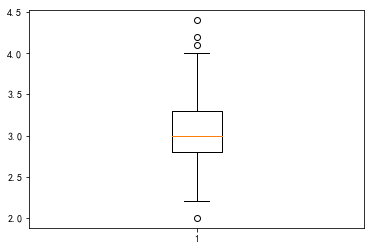

In [32]:
plt.boxplot(iris['sepal_width'])

### seaborn作图

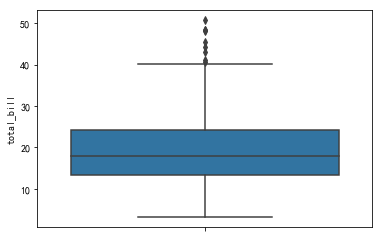

In [33]:
# 单变量箱线图
sns.boxplot(y='total_bill', data=tips)

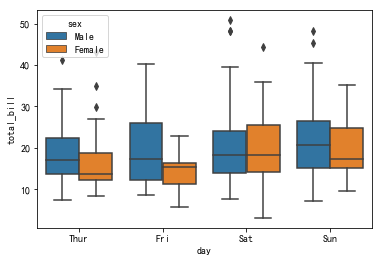

In [34]:
# 分组箱线图，两层分组，第一层分组因子是day，在x轴不同位置绘制，第二层分组因子是sex，不同的因子用不同颜色区分
# 相当于分组之后又分组
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips)

## 6. 小提琴图
小提琴图其实是箱线图与核密度图的结合，箱线图展示了分位数的位置，小提琴图则展示了任意位置的密度，通过小提琴图可以知道哪些位置的密度较高。在图中，白点是中位数，黑色盒型的范围是下四分位点到上四分位点，细黑线表示须。外部形状即为核密度估计（在概率论中用来估计未知的密度函数，属于非参数检验方法之一）。

### matplotlib作图

{'bodies': [<matplotlib.collections.PolyCollection at 0x27ec462a080>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x27ec4620f60>,
 'cmins': <matplotlib.collections.LineCollection at 0x27ec462a470>,
 'cbars': <matplotlib.collections.LineCollection at 0x27ec462a6d8>}

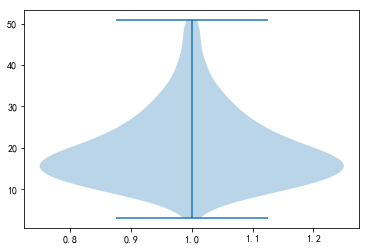

In [35]:
plt.violinplot(tips['total_bill'])

### seaborn作图

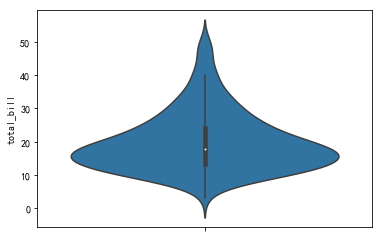

In [36]:
sns.violinplot(y='total_bill', data=tips)

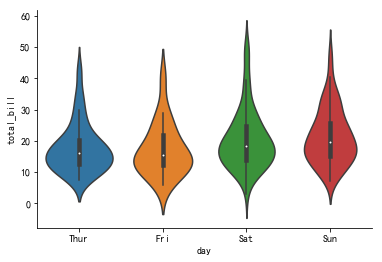

In [37]:
# 分组
sns.violinplot(x='day', y='total_bill', data=tips)
sns.despine()# 不显示网格边框线

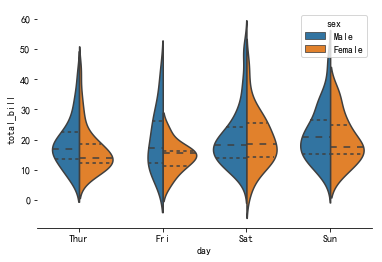

In [38]:
# 二次分组，各取一半组成一个小提琴图
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,
               inner="quart")
sns.despine(left=True)

## 7. 双变量关系图jointplot

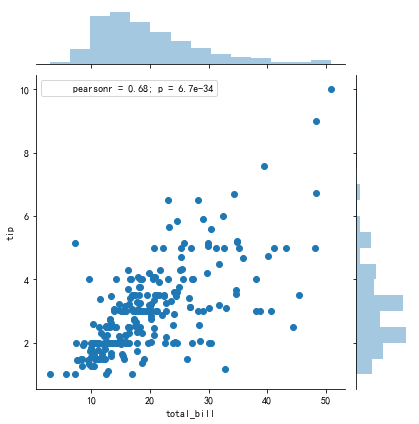

In [39]:
# kind参数可以使用不同的图形反应两变量的关系，比如点图，线图，核密度图
# 默认绘制双变量的散点图，计算两个变量的直方图，计算两个变量的相关系数和置信度
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
sns.jointplot(x='total_bill', y='tip', data=tips)

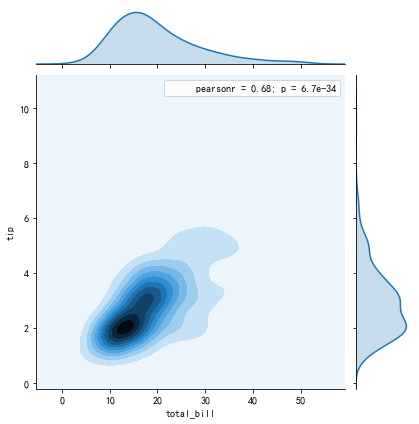

In [40]:
# 核密度
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

## 8. 回归图

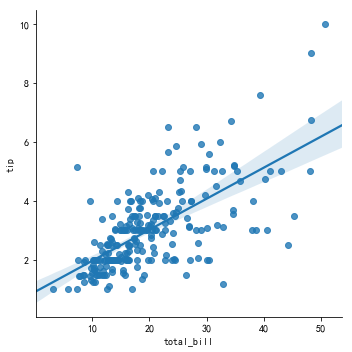

In [41]:
# 默认scatter=True, fit_reg=True
sns.lmplot(x="total_bill", y="tip", data=tips)

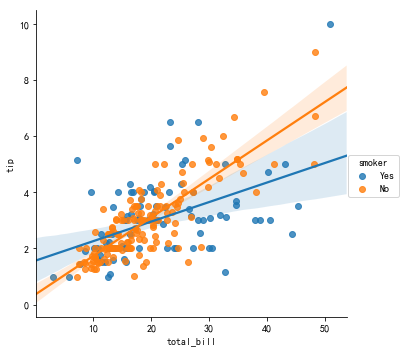

In [42]:
# 分组的线性回归图，通过hue参数控制
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

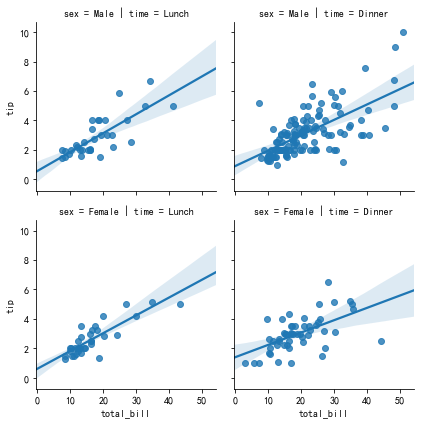

In [43]:
# col, row控制分组子图
sns.lmplot(x="total_bill", y="tip", row="sex", col="time", data=tips, size=3)

## 9. pairplot 图 
两两组合多个特征做出多个对比图

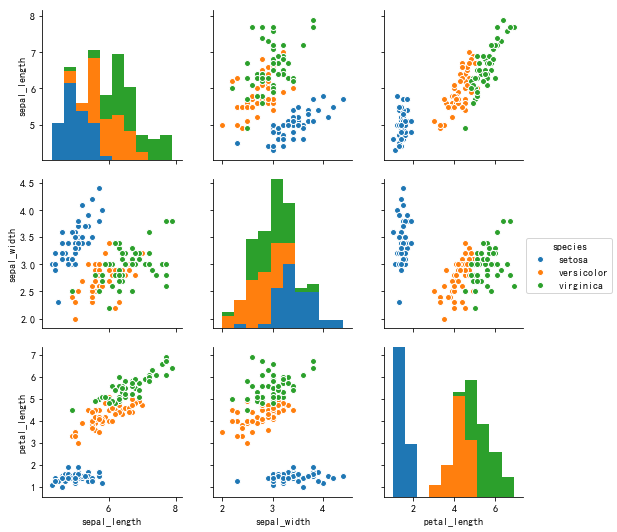

In [44]:
sns.pairplot(iris, vars=['sepal_length', 'sepal_width', 'petal_length'], hue="species")

## 10. heatmap 图
heatmap 图一般用来描述 feature 的相关性矩阵

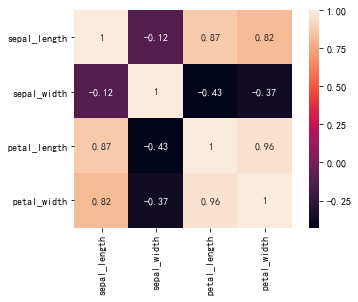

In [45]:
sns.heatmap(iris.corr(), square=True, annot=True)

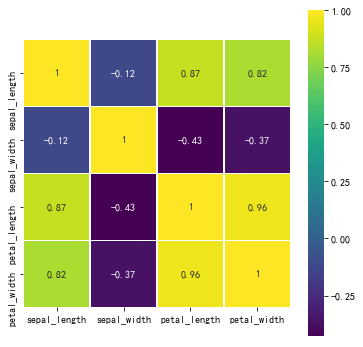

In [46]:
# 美化
colormap = plt.cm.viridis
plt.figure(figsize=(6,6)) 
sns.heatmap(iris.corr(),linewidths=0.1, square=True, cmap=colormap, linecolor='white', annot=True)

# 参考资料
1. [Seaborn 和 Matplotlib 数据可视化](https://www.jianshu.com/p/4b925654f506), 农大鲁迅, 简书
2. [python seaborn画图](https://blog.csdn.net/suzyu12345/article/details/69029106), 振裕, csdn
3. [Matplotlib Tutorial: Python Plotting](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python), Karlijn Willems, DataCamp